In [2]:
pip install pmdarima


  Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
   ------------- -------------------------- 204.8/625.1 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 5.6 MB/s eta 0:00:00
Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl (2.8 MB)


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [4]:
# Load data
data = pd.read_csv('Data/cloneData.csv')

In [5]:
# Define target and features
y = data['waste']
X = data[['population', 'gdp', 'householdMinIncome', 'death']]

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 19265759448.63837
R^2 Score: 0.9926864282550659


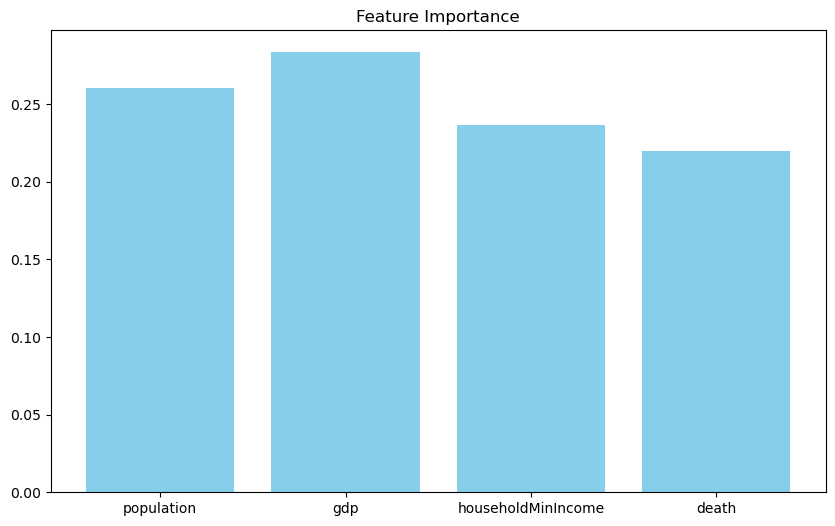

In [10]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='skyblue')
plt.title('Feature Importance')
plt.show()

In [11]:
# Function to forecast using auto_arima
def forecast_with_auto_arima(series, steps):
    model = auto_arima(series, seasonal=False, stepwise=True, suppress_warnings=True)
    forecast = model.predict(n_periods=steps)
    return forecast

In [19]:
# Forecasting each feature
future_years = [2025, 2026, 2027, 2028, 2029, 2030] 
forecast_periods = len(future_years)

In [20]:
# Forecast GDP
gdp_forecast = forecast_with_auto_arima(data['gdp'], forecast_periods)
print(f"Forecasted GDP for {future_years}: {gdp_forecast}")

# Forecast Population
population_forecast = forecast_with_auto_arima(data['population'], forecast_periods)
print(f"Forecasted Population for {future_years}: {population_forecast}")

# Forecast Household Minimum Income
household_min_income_forecast = forecast_with_auto_arima(data['householdMinIncome'], forecast_periods)
print(f"Forecasted Household Minimum Income for {future_years}: {household_min_income_forecast}")

# Forecast Death
death_forecast = forecast_with_auto_arima(data['death'], forecast_periods)
print(f"Forecasted Death for {future_years}: {death_forecast}")

Forecasted GDP for [2025, 2026, 2027, 2028, 2029, 2030]: 25    1.653871e+06
26    1.696876e+06
27    1.739881e+06
28    1.782886e+06
29    1.825891e+06
30    1.868897e+06
dtype: float64
Forecasted Population for [2025, 2026, 2027, 2028, 2029, 2030]: 25    34498962.5
26    34939125.0
27    35379287.5
28    35819450.0
29    36259612.5
30    36699775.0
dtype: float64
Forecasted Household Minimum Income for [2025, 2026, 2027, 2028, 2029, 2030]: 25    8833.791667
26    8989.583333
27    9145.375000
28    9301.166667
29    9456.958333
30    9612.750000
dtype: float64
Forecasted Death for [2025, 2026, 2027, 2028, 2029, 2030]: 25    205575.75
26    209770.50
27    213965.25
28    218160.00
29    222354.75
30    226549.50
dtype: float64


In [21]:
# Combine future data into a DataFrame
future_data = pd.DataFrame({
    'population': population_forecast,
    'gdp': gdp_forecast,
    'householdMinIncome': household_min_income_forecast,
    'death': death_forecast
})

In [22]:
print("Future Data for Prediction:")
print(future_data)

Future Data for Prediction:
    population           gdp  householdMinIncome      death
25  34498962.5  1.653871e+06         8833.791667  205575.75
26  34939125.0  1.696876e+06         8989.583333  209770.50
27  35379287.5  1.739881e+06         9145.375000  213965.25
28  35819450.0  1.782886e+06         9301.166667  218160.00
29  36259612.5  1.825891e+06         9456.958333  222354.75
30  36699775.0  1.868897e+06         9612.750000  226549.50


In [23]:
# Predict waste generation for each future year
predicted_waste = rf_model.predict(future_data)
for year, waste in zip(future_years, predicted_waste):
    print(f"Predicted Waste Generated for {year}: {waste}")

Predicted Waste Generated for 2025: 18771985.63
Predicted Waste Generated for 2026: 18771985.63
Predicted Waste Generated for 2027: 18764741.53
Predicted Waste Generated for 2028: 18757590.82
Predicted Waste Generated for 2029: 18757590.82
Predicted Waste Generated for 2030: 18757590.82


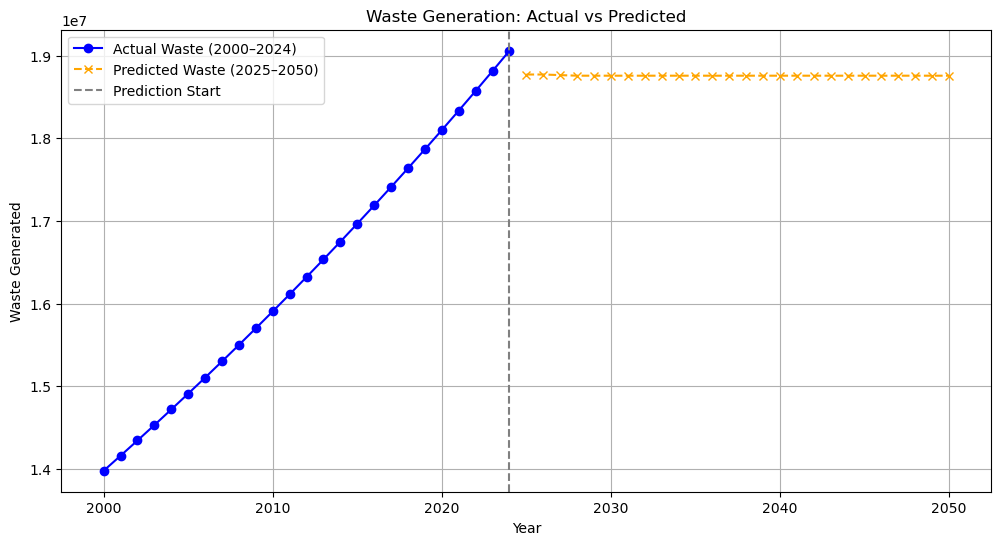

In [24]:
import matplotlib.pyplot as plt

# Define the prediction range
future_years = list(range(2025, 2051))  # From 2025 to 2050
forecast_periods = len(future_years)

# Generate forecasts for the features (using auto_arima as previously defined)
gdp_forecast = forecast_with_auto_arima(data['gdp'], forecast_periods)
population_forecast = forecast_with_auto_arima(data['population'], forecast_periods)
household_min_income_forecast = forecast_with_auto_arima(data['householdMinIncome'], forecast_periods)
death_forecast = forecast_with_auto_arima(data['death'], forecast_periods)

# Combine the forecasted features into a DataFrame
future_data = pd.DataFrame({
    'population': population_forecast,
    'gdp': gdp_forecast,
    'householdMinIncome': household_min_income_forecast,
    'death': death_forecast
})

# Predict future waste generation
predicted_waste = rf_model.predict(future_data)

# Combine actual and predicted data
years_actual = data['date']  # Assuming 'date' contains the year values (2000–2024)
years_future = future_years
all_years = list(years_actual) + years_future

# Combine actual and predicted waste data
waste_actual = list(data['waste'])  # Actual waste from 2000 to 2024
waste_predicted = list(predicted_waste)  # Predicted waste from 2025 to 2050
all_waste = waste_actual + waste_predicted

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(years_actual, waste_actual, label='Actual Waste (2000–2024)', color='blue', marker='o')
plt.plot(years_future, waste_predicted, label='Predicted Waste (2025–2050)', color='orange', linestyle='--', marker='x')
plt.axvline(x=2024, color='gray', linestyle='--', label='Prediction Start')
plt.title('Waste Generation: Actual vs Predicted')
plt.xlabel('Year')
plt.ylabel('Waste Generated')
plt.legend()
plt.grid()
plt.show()


In [27]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 640.0 kB/s eta 0:03:16
   ---------------------------------------- 0.3/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 2.4/124.9 MB 18.8 MB/s eta 0:00:07
   - -------------------------------------- 5.3/124.9 MB 31.0 MB/s eta 0:00:04
   --- ------------------------------------ 9.5/124.9 MB 43.2 MB/s eta 0:00:03
   ---- ----------------------------------- 13.5/124.9 MB 81.8 MB/s eta 0:00:02
   ----- ---------------------------------- 17.3/124.9 MB 81.8 MB/s eta 0:00:02
   ------ --------------------------------- 21.2/124.9 MB 81.8 MB/s eta 0:00:02
   -------- ------------------------------- 25.6/124.9 MB 93.0 MB/s eta 0:00:02
   --------- ------------------------------ 29.8/124.9 MB 93.9 MB/s eta 0:00:02
   ---------- ----------------------------- 34.3/124.9 MB 93.9 MB/s eta 0:00:01
   ------------ --------------------------- 38.6/124.9

Mean Squared Error: 44465632810.6
R^2 Score: 0.9831201777115927


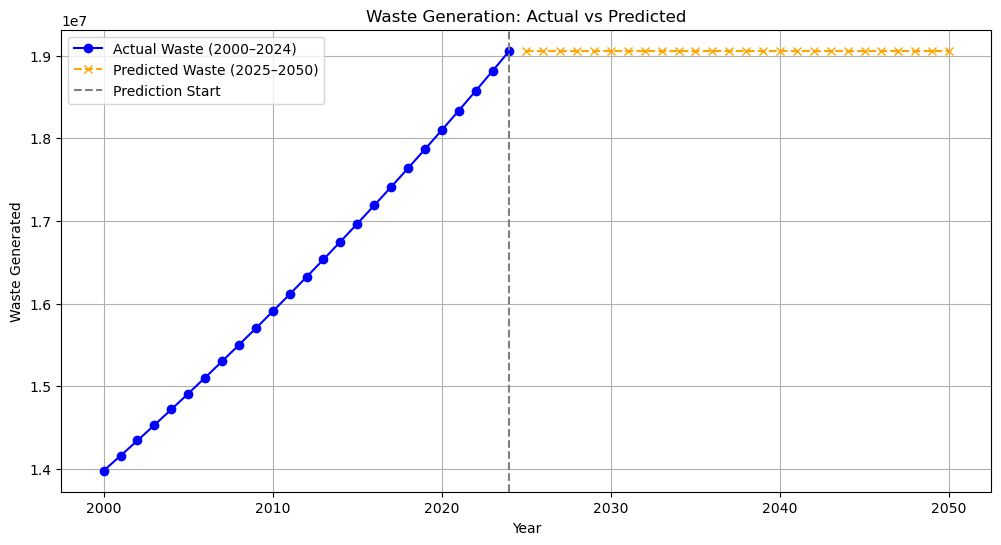